# Create dummy dataset

active subreddit (categorical)   values (categorical)   succesful (binary)

In [1]:
import os
import numpy as np
import pandas as pd
import random

In [2]:
df = pd.read_csv("final_results.csv")

In [3]:
df.head()

,body,pred_int_labels,score,successful,delta,active_subreddit,values
0,The argument: 'I second the legal aspect. Whil...,[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. ...,9.0,True,False,Lifestyle,"Security: personal,Tradition,Conformity: rules..."
1,The argument: 'How do you feel about 14-year-o...,[0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. ...,5.0,True,False,General,"Self-direction: action,Achievement,Power: reso..."
2,The argument: 'Hate speech provides nothing us...,[1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. ...,0.0,False,False,General,"Self-direction: thought,Self-direction: action..."
3,The argument: 'I don't disagree that it's okay...,[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. ...,1.0,True,True,Lifestyle,"Self-direction: thought,Self-direction: action..."
4,The argument: 'If you're a good parent then yo...,[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. ...,1.0,True,False,News and Politics,"Self-direction: action,Achievement,Benevolence..."


# Descriptive

### Set colors

In [4]:
import matplotlib.pyplot as plt

# Define a custom color palette
color_palette = plt.get_cmap('tab20')

# Split the 'values' column into multiple columns using get_dummies
df_values = df['values'].str.get_dummies(sep=',')

# Concatenate the original DataFrame with the new dummy variable columns
df_concat = pd.concat([df, df_values], axis=1)

### Frequency of value per category

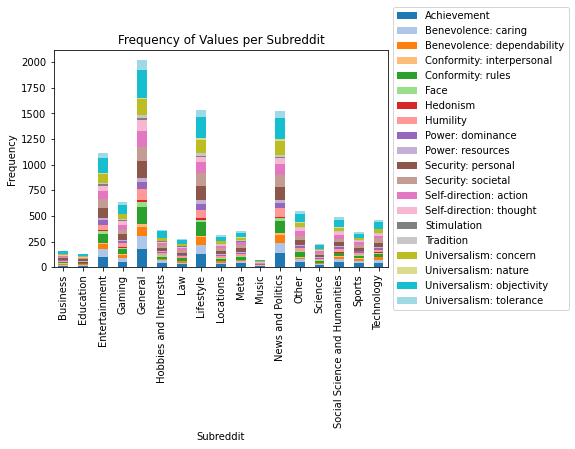

In [5]:
# Count the frequency of values per subreddit
value_counts = df_concat.groupby('active_subreddit')[df_values.columns].sum()

# Plot the frequency of values per subreddit
value_counts.plot(kind='bar', stacked=True, colormap=color_palette)

# Move the legend to the right side of the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set the plot title and axis labels
plt.title('Frequency of Values per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Frequency')

# Display the plot
plt.show()

### Percentage of value per category

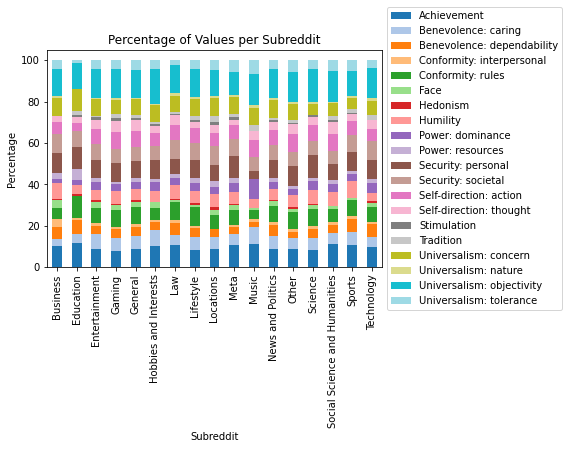

In [6]:
# Calculate the percentage of values per subreddit
value_counts = df_concat.groupby('active_subreddit')[df_values.columns].sum()
value_totals = value_counts.sum(axis=1)
value_percentages = value_counts.divide(value_totals, axis=0) * 100

# Plot the percentages of values per subreddit
value_percentages.plot(kind='bar', stacked=True, colormap=color_palette)

# Move the legend to the right side of the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set the plot title and axis labels
plt.title('Percentage of Values per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Percentage')

# Display the plot
plt.show()

### Frequency of value per succesful or not per category


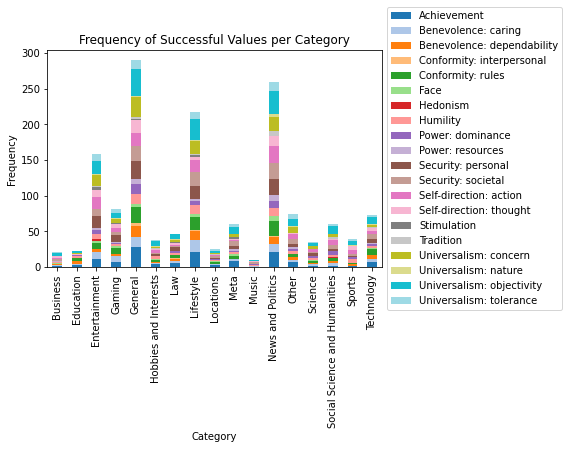

In [7]:
# Split the 'values' column into multiple columns
df_values = df['values'].str.split(',', expand=True)

# Stack the values columns to create a single column
df_values_stacked = df_values.stack().reset_index(level=1, drop=True).rename('values')

# Create a new DataFrame with stacked values and successful flag
df_success_stacked = pd.concat([df['active_subreddit'], df_values_stacked, df['delta']], axis=1)

# Filter the DataFrame to include only successful rows
df_success = df_success_stacked[df_success_stacked['delta']]

# Create a pivot table to calculate the frequency of successful values per category
success_counts = df_success.pivot_table(index='active_subreddit', columns='values', values='delta', aggfunc='size', fill_value=0)

# Reset the index of the pivot table
success_counts.reset_index(inplace=True)

# Plot the frequency of successful values per category
success_counts.plot(x='active_subreddit', kind='bar', stacked=True, colormap=color_palette)

# Move the legend to the right side of the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set the plot title and axis labels
plt.title('Frequency of Successful Values per Category')
plt.xlabel('Category')
plt.ylabel('Frequency')

# Display the plot
plt.show()

# Inferential

The results of the chi-square test provide information about the association between successful values and subreddits. Specifically, the test helps determine if the distribution of (successful) values differs significantly across different subreddits.

The chi-square statistic measures the overall difference between the observed frequencies and the expected frequencies under the assumption of independence. A higher chi-square value indicates a larger deviation from the expected frequencies, suggesting a stronger association between the variables.

The p-value associated with the chi-square statistic indicates the statistical significance of the observed association. A small p-value (typically below a predetermined significance level, such as 0.05) suggests that the observed association is unlikely to have occurred by chance alone. In other words, a small p-value indicates that there is evidence of a significant relationship between successful values and subreddits.

Interpreting the results:

If the chi-square statistic is large and the p-value is small (below the significance level), it suggests that there is a statistically significant association between successful values and subreddits. The variables are likely dependent on each other, and the distribution of successful values differs across subreddits.

If the chi-square statistic is small and the p-value is large (above the significance level), it suggests that there is no strong evidence of an association between successful values and subreddits. The variables may be independent, and any observed differences in the distribution of successful values could be due to random chance.

### Chi square over distribution of values

In [8]:
from scipy.stats import chisquare

# Calculate the value counts across all subreddits
total_value_counts = df['values'].str.split(',', expand=True).stack().value_counts()

#print(total_value_counts)

# Normalize the total value counts
total_value_counts_normalized = total_value_counts / total_value_counts.sum()

list_all_values = list(total_value_counts_normalized.index)

# Calculate the value counts per subreddit and perform chi-squared test
for subreddit in df['active_subreddit'].unique():
    # Filter the DataFrame for the specific 'active_subreddit'
    subreddit_df = df[df['active_subreddit'] == subreddit]
    
    # Group the DataFrame by 'values' and count the frequency
    value_counts = subreddit_df['values'].str.split(',', expand=True).stack().value_counts()
    
    # Normalize the value counts
    value_counts_normalized = value_counts / value_counts.sum()
    list_subreddit_values = list(value_counts_normalized.index)
    
    missing_values = list(set(list_all_values) - set(list_subreddit_values))
    #print(missing_values)
    
    if len(missing_values) > 0:
        for missing_val in missing_values:
            value_counts_normalized[missing_val] = 0
    
    # Perform chi-squared test
    chi2, p_value = chisquare(value_counts_normalized, total_value_counts_normalized)
    
    print("Active Subreddit:", subreddit)
    print("Chi-square statistic:", chi2)
    print("P-value:", p_value)
    print()


Active Subreddit: Lifestyle
Chi-square statistic: 0.004927515007404179
P-value: 1.0

Active Subreddit: General
Chi-square statistic: 0.004900334803401519
P-value: 1.0

Active Subreddit: News and Politics
Chi-square statistic: 0.00432216510317555
P-value: 1.0

Active Subreddit: Business
Chi-square statistic: 0.04519706716138715
P-value: 1.0

Active Subreddit: Gaming
Chi-square statistic: 0.005902003161399697
P-value: 1.0

Active Subreddit: Social Science and Humanities
Chi-square statistic: 0.017820312681669878
P-value: 1.0

Active Subreddit: Entertainment
Chi-square statistic: 0.005940351599202786
P-value: 1.0

Active Subreddit: Hobbies and Interests
Chi-square statistic: 0.022819147298273328
P-value: 1.0

Active Subreddit: Music
Chi-square statistic: 0.044673672364022005
P-value: 1.0

Active Subreddit: Technology
Chi-square statistic: 0.01503129928729886
P-value: 1.0

Active Subreddit: Other
Chi-square statistic: 0.01348033043161867
P-value: 1.0

Active Subreddit: Science
Chi-square s

### Chi square over distribution of succesful values

In [9]:
# Filter the DataFrame to include only successful values
successful_df = df[df['delta']]

# Calculate the value counts of successful values across all subreddits
total_value_counts = successful_df['values'].str.split(',', expand=True).stack().value_counts()

# Normalize the total value counts
total_value_counts_normalized = total_value_counts / total_value_counts.sum()
#print(total_value_counts_normalized)
list_all_values = list(total_value_counts_normalized.index)

# Calculate the value counts of successful values per subreddit and perform chi-squared test
for subreddit in successful_df['active_subreddit'].unique():
    # Filter the DataFrame for the specific 'active_subreddit'
    subreddit_df = successful_df[successful_df['active_subreddit'] == subreddit]
    
    # Group the DataFrame by 'values' and count the frequency of successful values
    value_counts = subreddit_df['values'].str.split(',', expand=True).stack().value_counts()
    
    # Normalize the value counts
    value_counts_normalized = value_counts / value_counts.sum()
    
    missing_values = list(set(list_all_values) - set(list_subreddit_values))
    #print(missing_values)
    
    if len(missing_values) > 0:
        for missing_val in missing_values:
            value_counts_normalized[missing_val] = 0
    
    #print(value_counts_normalized)
    # Perform chi-squared test
    try:
        chi2, p_value = chisquare(value_counts_normalized, total_value_counts_normalized)
    
        print("Active Subreddit:", subreddit)
        print("Chi-square statistic:", chi2)
        print("P-value:", p_value)
        print()
    except:
        print("chi square failed")


Active Subreddit: Lifestyle
Chi-square statistic: 0.03232228423748888
P-value: 1.0

chi square failed
chi square failed
Active Subreddit: General
Chi-square statistic: 0.010356311688240883
P-value: 1.0

chi square failed
chi square failed
Active Subreddit: Entertainment
Chi-square statistic: 0.040857641482265665
P-value: 1.0

chi square failed
chi square failed
chi square failed
chi square failed
chi square failed
chi square failed
chi square failed
chi square failed
chi square failed
chi square failed


# Correlation

correlation efficient between pairs of values: expressed together or mutually exclusive?

Correlation Matrix:
                            Achievement  Benevolence: caring  \
Achievement                    1.000000            -0.081015   
Benevolence: caring           -0.081015             1.000000   
Benevolence: dependability    -0.068745            -0.055411   
Conformity: interpersonal     -0.035265            -0.028425   
Conformity: rules             -0.092255            -0.074361   
Face                          -0.046255            -0.037283   
Hedonism                      -0.026820            -0.021618   
Humility                      -0.077419            -0.062402   
Power: dominance              -0.061851            -0.049854   
Power: resources              -0.045060            -0.036320   
Security: personal            -0.097732            -0.078775   
Security: societal            -0.090606            -0.073031   
Self-direction: action        -0.089184            -0.071885   
Self-direction: thought       -0.066825            -0.053863   
Stimulation         

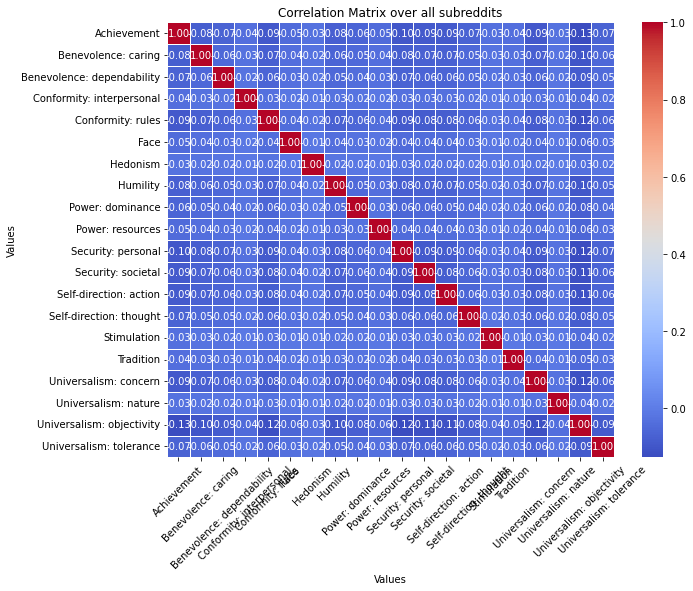

In [10]:
import seaborn as sns

# Split the 'values' column into multiple entries
df_values = df['values'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('values')

# Create a new DataFrame with the expanded 'values' column
expanded_df = df.loc[df.index.repeat(df['values'].str.count(',') + 1)].copy()
expanded_df['values'] = df_values

# Calculate the correlation coefficient between pairs of values
correlation_matrix = expanded_df['values'].str.get_dummies().corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix over all subreddits')
plt.xlabel('Values')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [11]:
df.delta.value_counts()

False    2218
True      355
Name: delta, dtype: int64